In [8]:
import tensorflow as tf

data = tf.keras.datasets.mnist
(X_train,y_train), (X_test,y_test) = data.load_data()

X_train = tf.keras.utils.normalize(X_train)
X_test = tf.keras.utils.normalize(X_test)

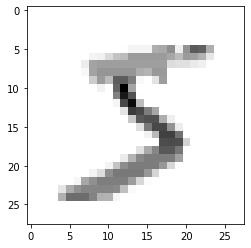

In [9]:
import matplotlib.pyplot as plt 

plt.imshow(X_train[0],cmap = plt.cm.binary)
plt.show()

In [14]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation = 'relu'))
model.add(tf.keras.layers.Dense(128,activation = 'relu'))
model.add(tf.keras.layers.Dense(10,activation = 'softmax'))
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'],optimizer = 'adam')
model.fit(X_train,y_train,epochs = 5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 113us/sample - loss: 0.2613 - accuracy: 0.9217
Epoch 2/5
60000/60000 [==============================] - 6s 102us/sample - loss: 0.1076 - accuracy: 0.9666
Epoch 3/5
60000/60000 [==============================] - 6s 99us/sample - loss: 0.0748 - accuracy: 0.9764
Epoch 4/5
60000/60000 [==============================] - 6s 99us/sample - loss: 0.0563 - accuracy: 0.9819
Epoch 5/5
60000/60000 [==============================] - 6s 103us/sample - loss: 0.0452 - accuracy: 0.9852


In [16]:
val_loss,val_accu = model.evaluate(X_test,y_test)
print(val_loss,val_accu)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0837890631889226 0.9754


In [17]:
model.save('digits.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: digits.model/assets


In [18]:
loadm = tf.keras.models.load_model('digits.model')

In [19]:
prediction = loadm.predict([X_test])

In [22]:
import numpy as np
print(np.argmax(prediction[1]))

2


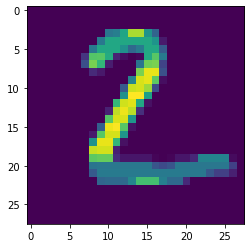

In [23]:
plt.imshow(X_test[1])